# Imports Overview

In [48]:
# Data fetching
import yfinance as yf          # download stock market data

# Data handling
import pandas as pd            # tabular data manipulation
import numpy as np             # numerical computations

# Visualization
import matplotlib.pyplot as plt  # basic plotting
%matplotlib inline
import seaborn as sns            # statistical/advanced visualization

# Date and time
from datetime import datetime    # handle timestamps and date operations

# Date Range Setup

- **end_date**: Today's date and time.  
- **start_date**: Same day and month, but 20 years earlier.


In [49]:
# today's date and time
end_date = datetime.now()  

# same day and month but 20 years earlier
start_date = datetime(end_date.year - 20, end_date.month, end_date.day)  

# Download Google Stock Data

In [50]:
# Define stock ticker symbol
stock = "GOOG"  

# Download historical stock data from Yahoo Finance (unadjusted)
google_data = yf.download(stock, start_date, end_date, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


# Close vs Adjusted Close

- **Close**: Raw closing price of the stock for the day.  
- **Adj Close**: Closing price adjusted for **splits, dividends, and distributions**, representing the true investment value.

In [51]:
google_data.head()

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          GOOG      GOOG      GOOG      GOOG      GOOG       GOOG
Date                                                                   
2005-08-30  7.112653  7.154932  7.210722  7.120311  7.157920  192398464
2005-08-31  7.081208  7.123300  7.185567  7.082453  7.178842  202114747
2005-09-01  7.087399  7.129527  7.160660  7.098393  7.121059  110095123
2005-09-02  7.141868  7.184321  7.222678  7.134259  7.136003  137894934
2005-09-06  7.108691  7.150946  7.207734  7.143225  7.198020  169123549

# Data Analysis

1. **Dataset Shape**
   - `google_data.shape`: (5032, 6) â†’ 5032 rows (days) and 6 columns (Open, High, Low, Close, Adj Close, Volume)

In [52]:
google_data.shape

(5032, 6)

2. **Summary Statistics**
- `google_data.describe()`: Provides statistical overview of numerical columns:
  - **count**: Number of non-missing entries  
  - **mean**: Average value  
  - **std**: Standard deviation  
  - **min / max**: Minimum and maximum values  
  - **25%, 50%, 75%**: Quartiles

In [53]:
google_data.describe()

Price     Adj Close        Close         High          Low         Open  \
Ticker         GOOG         GOOG         GOOG         GOOG         GOOG   
count   5032.000000  5032.000000  5032.000000  5032.000000  5032.000000   
mean      54.133600    54.416894    54.977766    53.837720    54.391937   
std       51.233030    51.443709    51.998544    50.875605    51.406206   
min        6.374077     6.411966     6.709103     6.159413     6.538243   
25%       14.086900    14.170635    14.293113    14.046164    14.175180   
50%       31.353379    31.539749    31.834249    31.208500    31.620501   
75%       75.484196    75.932875    76.645601    75.296675    75.780748   
max      213.529999   213.529999   215.339996   210.970001   211.270004   

Price         Volume  
Ticker          GOOG  
count   5.032000e+03  
mean    9.459843e+07  
std     1.184009e+08  
min     1.584340e+05  
25%     2.561000e+07  
50%     4.408900e+07  
75%     1.177025e+08  
max     1.650833e+09

4. **Dataset Info**
- `google_data.info()`: Displays dataset structure:
  - Column names and data types  
  - Number of non-null entries per column  
  - Memory usage of the DataFrame

In [54]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-08-30 to 2025-08-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5032 non-null   float64
 1   (Close, GOOG)      5032 non-null   float64
 2   (High, GOOG)       5032 non-null   float64
 3   (Low, GOOG)        5032 non-null   float64
 4   (Open, GOOG)       5032 non-null   float64
 5   (Volume, GOOG)     5032 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


4. **Data Quality**
   - **No Null Values**: The dataset contains no missing or NaN entries.

In [55]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

# Data Visualization

In [56]:
# Function to plot any column of Google stock data
def plot_graph(figsize, values, column_name):
    """
    Plots a time series graph for the given column.

    Parameters:
    - figsize: tuple, size of the figure (width, height)
    - values: pd.Series, column values to plot
    - column_name: str, name of the column for labels and title
    """
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google Data")
    plt.show()

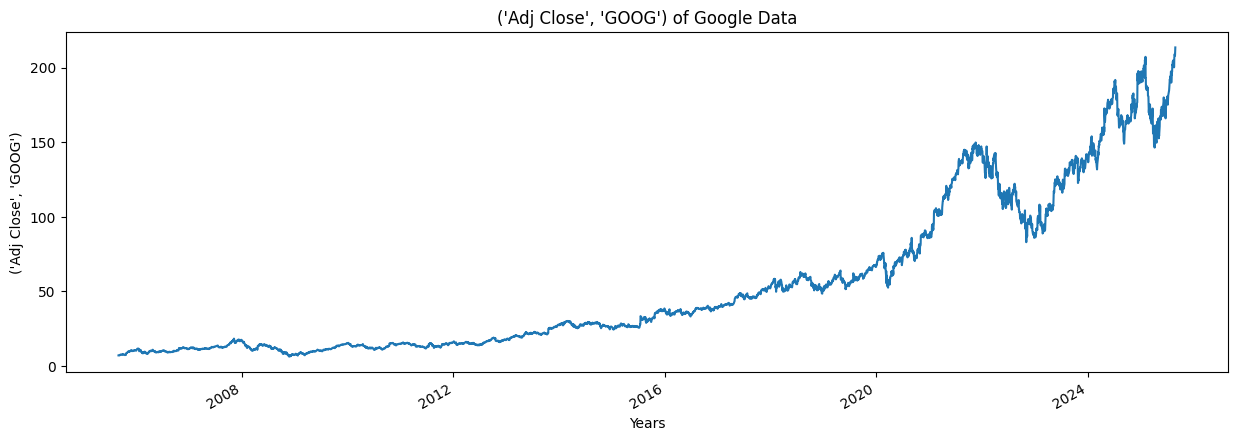

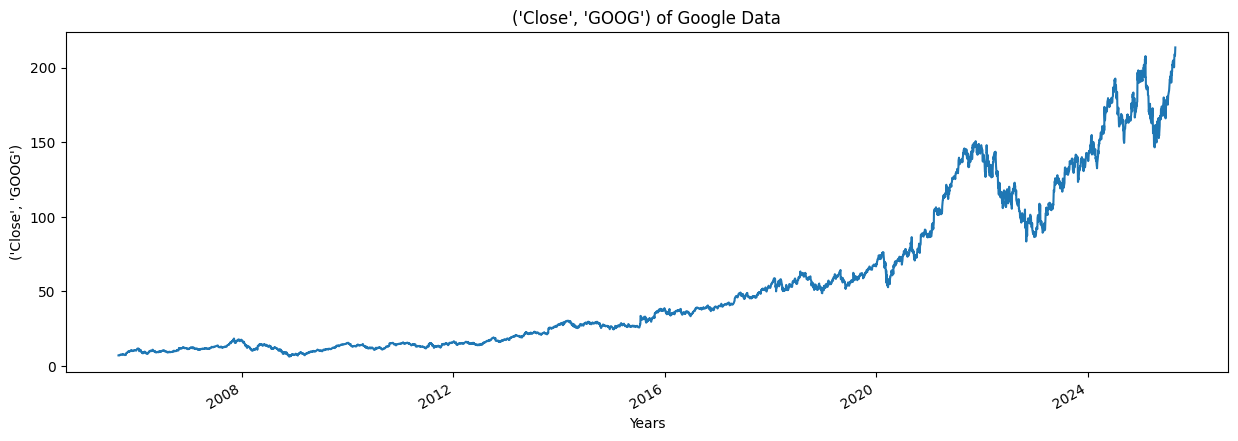

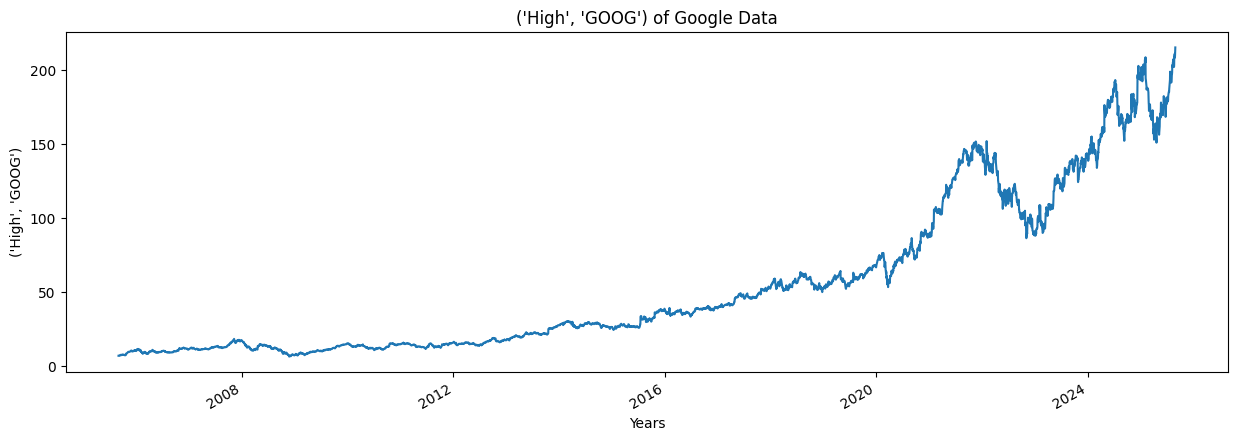

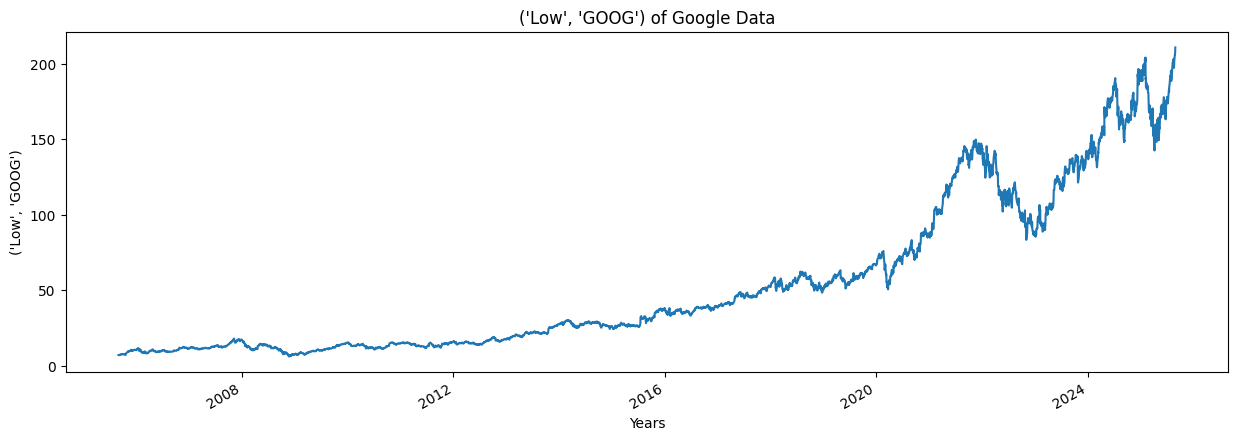

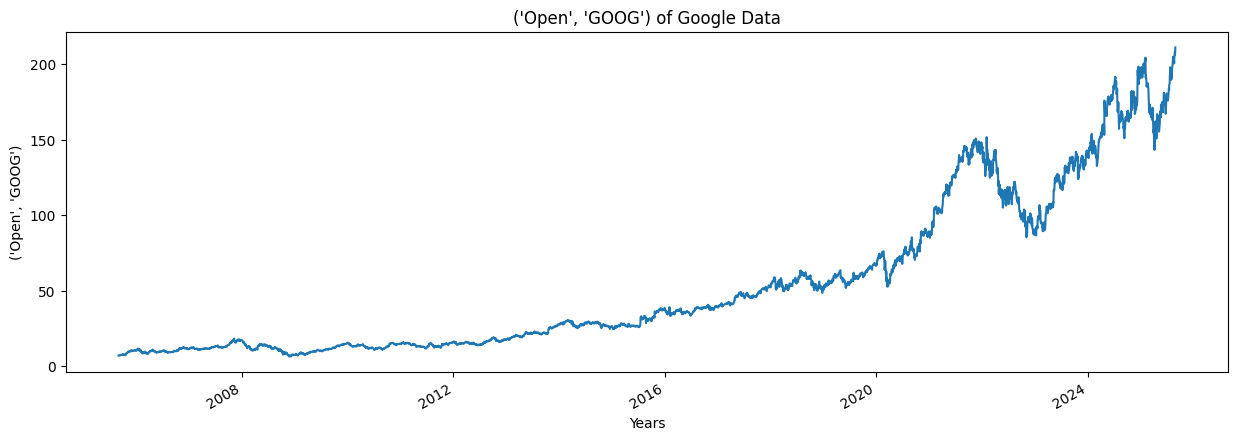

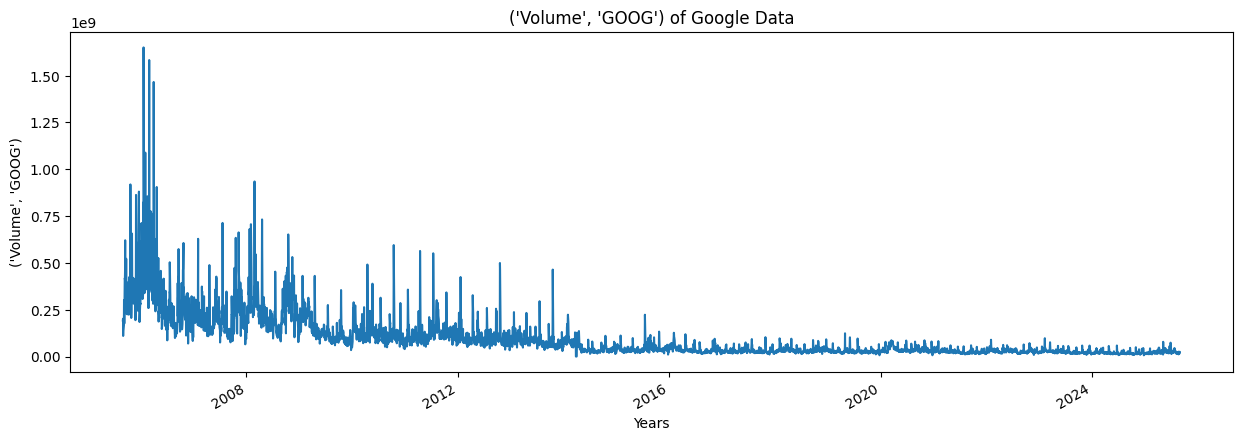

In [57]:
# Plot all columns of google_data using the plot_graph function
for column in google_data.columns:
    plot_graph((15,5), google_data[column], column)

# Moving Average

- **Definition**: The average of a stock's price over a specific number of past periods.  
- **Purpose**: Smooths out short-term fluctuations and highlights trends.  


1. Yearly Data Count

In [ ]:
years = range(2005, 2025)                     # Years to check
yearly_counts = list(google_data.index.year)  # Extract years from index

for year in years:
    print(year, yearly_counts.count(year))

2005 86
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
